In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
tommy = cv2.imread("Images/tommy1.jpg",0)

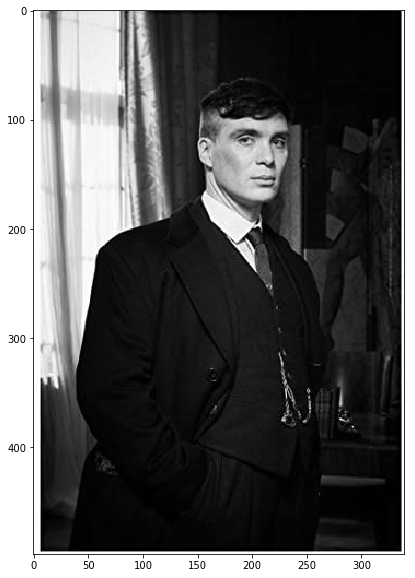

In [5]:
display(tommy)

In [6]:
tommy_sample = cv2.imread("Images/tommy2.jpg",0)

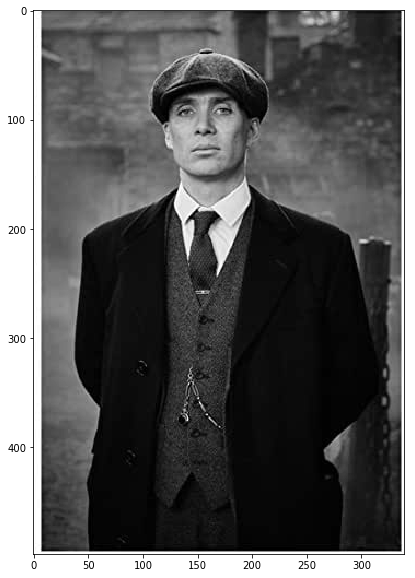

In [7]:
display(tommy_sample)

### Bruteforce Detection with ORB Detectors

In [8]:
orb = cv2.ORB_create()

In [9]:
key_points1, des1 = orb.detectAndCompute(tommy,None)
key_points2, des2 = orb.detectAndCompute(tommy_sample,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck =True)

In [11]:
matches = bf.match(des1,des2)

In [12]:
matches = sorted(matches,key=lambda x:x.distance)

In [13]:
tommy_matches = cv2.drawMatches(tommy,key_points1,tommy_sample,key_points2,matches[:50],None,flags=2)

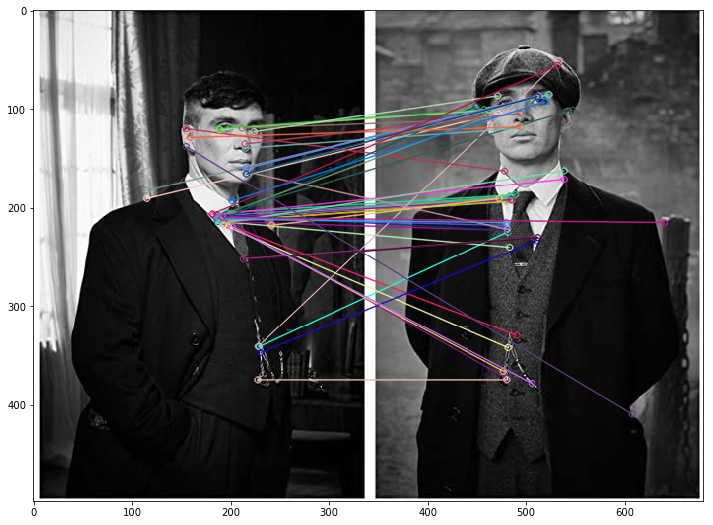

In [14]:
display(tommy_matches)

### Sift Descripters

In [15]:
sift = cv2.xfeatures2d.SIFT_create()

In [16]:
kp1,des1 = sift.detectAndCompute(tommy,None)
kp2,des2 = sift.detectAndCompute(tommy_sample,None)

In [17]:
bf = cv2.BFMatcher()

In [18]:
matches = bf.knnMatch(des1,des2,k=2)

In [19]:
good = []
for match1,match2 in matches:
    if match1.distance<0.75*match2.distance:
        good.append([match1])
        

In [20]:
len(good)

21

In [21]:
len(matches)

410

In [23]:
sift_matches = cv2.drawMatchesKnn(tommy,kp1,tommy_sample,kp2,good,None, flags=2)

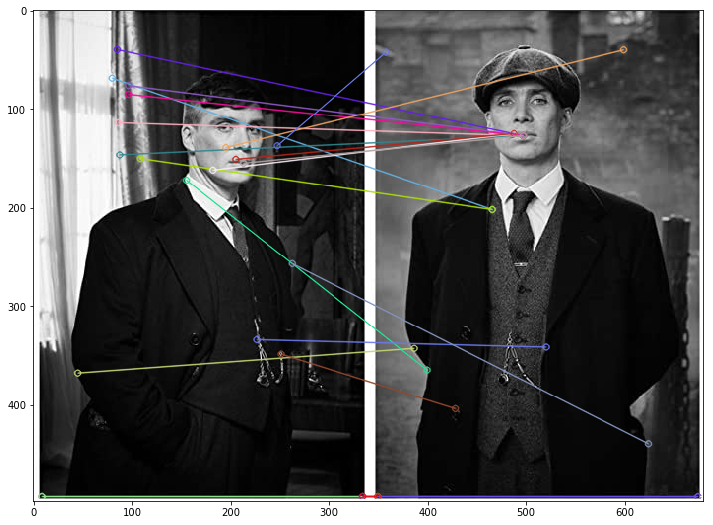

In [25]:
display(sift_matches)

### FLANN Based Matching

In [44]:
sift = cv2.xfeatures2d.SIFT_create()

In [45]:
kp1,des1 = sift.detectAndCompute(tommy,None)
kp2,des2 = sift.detectAndCompute(tommy_sample,None)

In [46]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm =FLANN_INDEX_KDTREE,trees =5)
search_params = dict(checks=50)

In [47]:
 flann = cv2.FlannBasedMatcher(index_params,search_params)

In [48]:
matches  = flann.knnMatch(des1,des2,k=2)

In [50]:
matches_mask = [[0,0] for i in range(len(matches))] 

In [51]:
for i,(match1, match2) in enumerate(matches):
    if match1.distance<0.75*match2.distance:
        matches_mask[i] = [1,0]
        

In [56]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0
                  )

NameError: name 'matchesMask' is not defined

In [55]:
flann_matched = cv2.drawMatchesKnn(tommy, kp1, tommy_sample,kp2,matches,None,**draw_params)

TypeError: 'match_mask' is an invalid keyword argument for this function

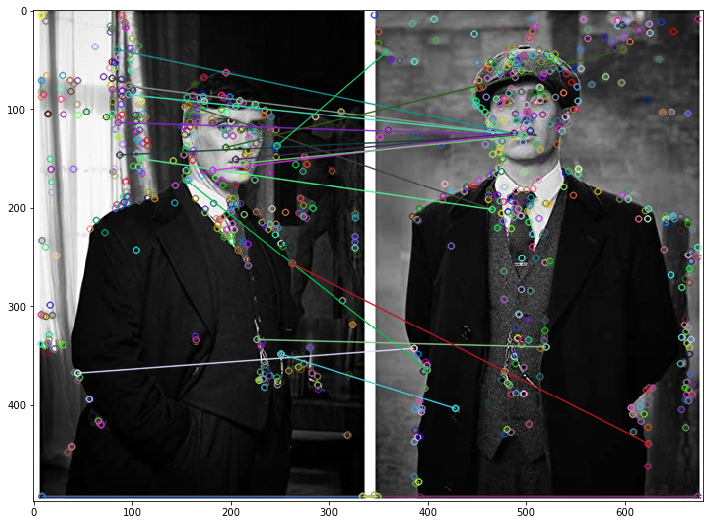

In [43]:
display(flann_matched)